# Biomedical Digital Image Processing

In [136]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import defaultdict
import cv2
from utils import *

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['font.size'] = 5

---
# 06. Binary Image Operation

### Base Image

([], [])

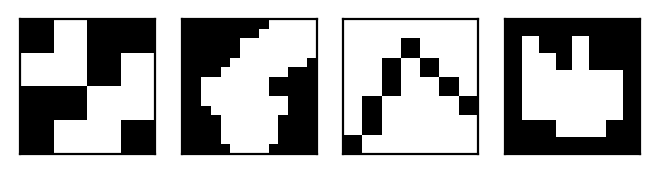

In [137]:
matrix1 = np.array([
    [0, 1, 0, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 1],
    [0, 1, 1, 0]
]) * 255

matrix2 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
]) * 255

matrix3 = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1],
    [1, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]
]) * 255

matrix4 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
]) * 255

plt.subplot(1, 4, 1)
plt.imshow(matrix1, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 2)
plt.imshow(matrix2, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 3)
plt.imshow(matrix3, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.subplot(1, 4, 4)
plt.imshow(matrix4, cmap='gray')
plt.xticks([])
plt.yticks([])

### Connected Component Labeling

In [138]:
def CCL(img):
    label = 1
    answer = np.zeros_like(img)
    answer = np.pad(answer, 1)
    img_ref = img.copy()
    img_ref = np.pad(img_ref, 1)

    for h in range(1, img.shape[0]+1):
        for w in range(1, img.shape[1]+1):
            if img_ref[h, w] != 0:
                u = answer[h-1, w]
                l = answer[h, w-1]
                if u == 0 and l == 0:
                    answer[h, w] = label
                    label += 1
                elif (u==0 and l!=0) or (u!=0 and l==0):
                    answer[h, w] = u if u else l
                elif u != l:
                    lbl = min(u, l)
                    answer[h-1, w] = lbl
                    answer[h, w-1] = lbl
                    answer[h, w] = lbl

    unique_labels = np.unique(answer)
    label_map = {old_label: new_label for new_label, old_label in enumerate(unique_labels[unique_labels != 0], start=1)}
    for h in range(1, img.shape[0]+1):
        for w in range(1, img.shape[1]+1):
            if label_map.get(answer[h, w]):
                answer[h, w] = label_map[answer[h, w]]
    return answer[1:-1, 1:-1]

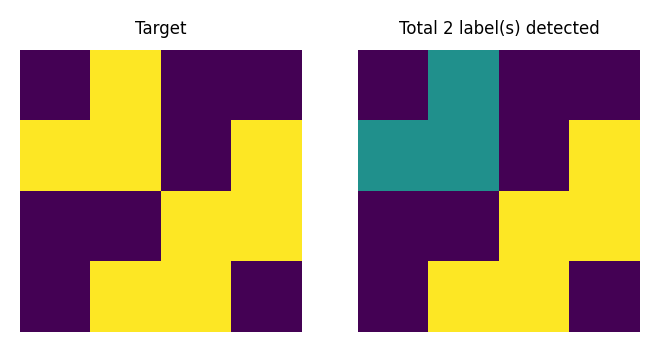

In [139]:
plt.subplot(1, 2, 1)
plt.imshow(matrix1)
plt.axis('off')
plt.title('Target')

plt.subplot(1, 2, 2)
connected_component_matrix1 = CCL(matrix1)
plt.imshow(connected_component_matrix1)
plt.axis('off')
plt.title(f'Total {len(set(connected_component_matrix1.flatten()))-1} label(s) detected')

plt.savefig('./img/06_CCL.png', dpi=150, bbox_inches='tight')

### Chamfer Distance

In [140]:
def chamfer(img, pad_value=0):
    img_ref = img.copy()
    img_ref = np.pad(img_ref, 1, 'constant', constant_values=pad_value)
    answer = np.zeros_like(img)
    for h in range(img.shape[0]):
        for w in range(img.shape[1]):
            answer[h, w] = 255 if img[h, w] else 0
    answer = np.pad(answer, 1, 'constant', constant_values=pad_value)

    # Forward
    for h in range(1, img.shape[0]+1):
        for w in range(1, img.shape[1]+1):
            if answer[h, w] > 0:
                answer[h, w] = min(answer[h, w-1]+3, answer[h-1, w-1]+4, answer[h-1, w]+3, answer[h-1, w+1]+4)
    # Backward
    for h in reversed(range(1, img.shape[0]+1)):
        for w in reversed(range(1, img.shape[1]+1)):
            if answer[h, w] > 0:
                answer[h, w] = min(answer[h, w], answer[h, w+1]+3, answer[h+1, w+1]+4, answer[h+1, w]+3, answer[h+1, w-1]+4)
    return answer[1:-1, 1:-1]

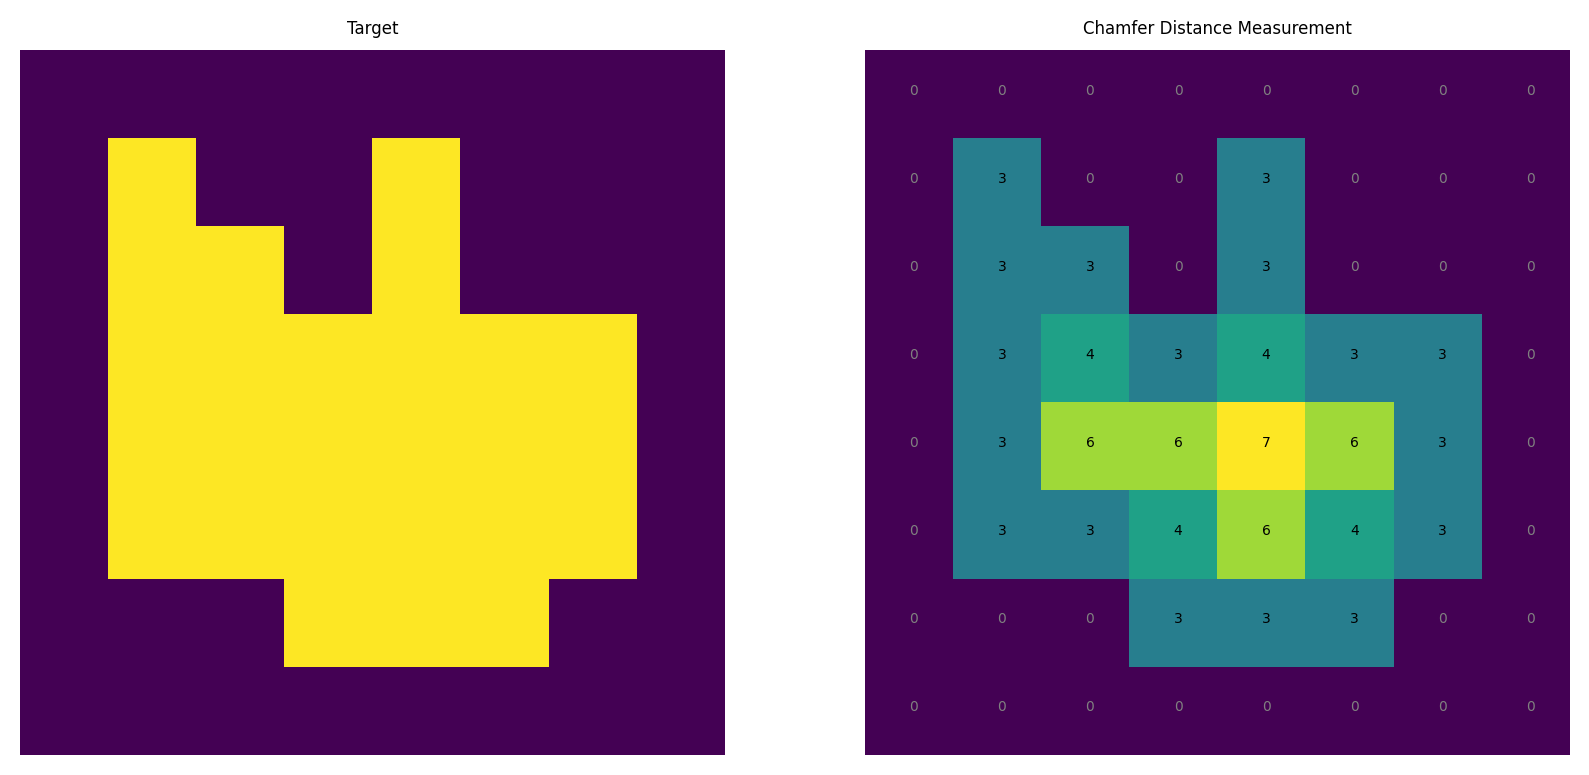

In [141]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(matrix4)
plt.axis('off')
plt.title('Target')

plt.subplot(1, 2, 2)
matrix4_chamfer = chamfer(matrix4)
plt.imshow(matrix4_chamfer)
for y in range(matrix4_chamfer.shape[0]):
    for x in range(matrix4_chamfer.shape[1]):
        if matrix4_chamfer[y, x] == 0:
            plt.text(x, y, str(matrix4_chamfer[y, x]), fontdict={'color':'gray'})
        else:
            plt.text(x, y, str(matrix4_chamfer[y, x]))
plt.axis('off')
plt.title('Chamfer Distance Measurement')
#plt.colorbar(shrink=0.7)

plt.savefig('./img/06_chamfer.png', dpi=150, bbox_inches='tight')

#### Chamfer Distance - When changing padding value

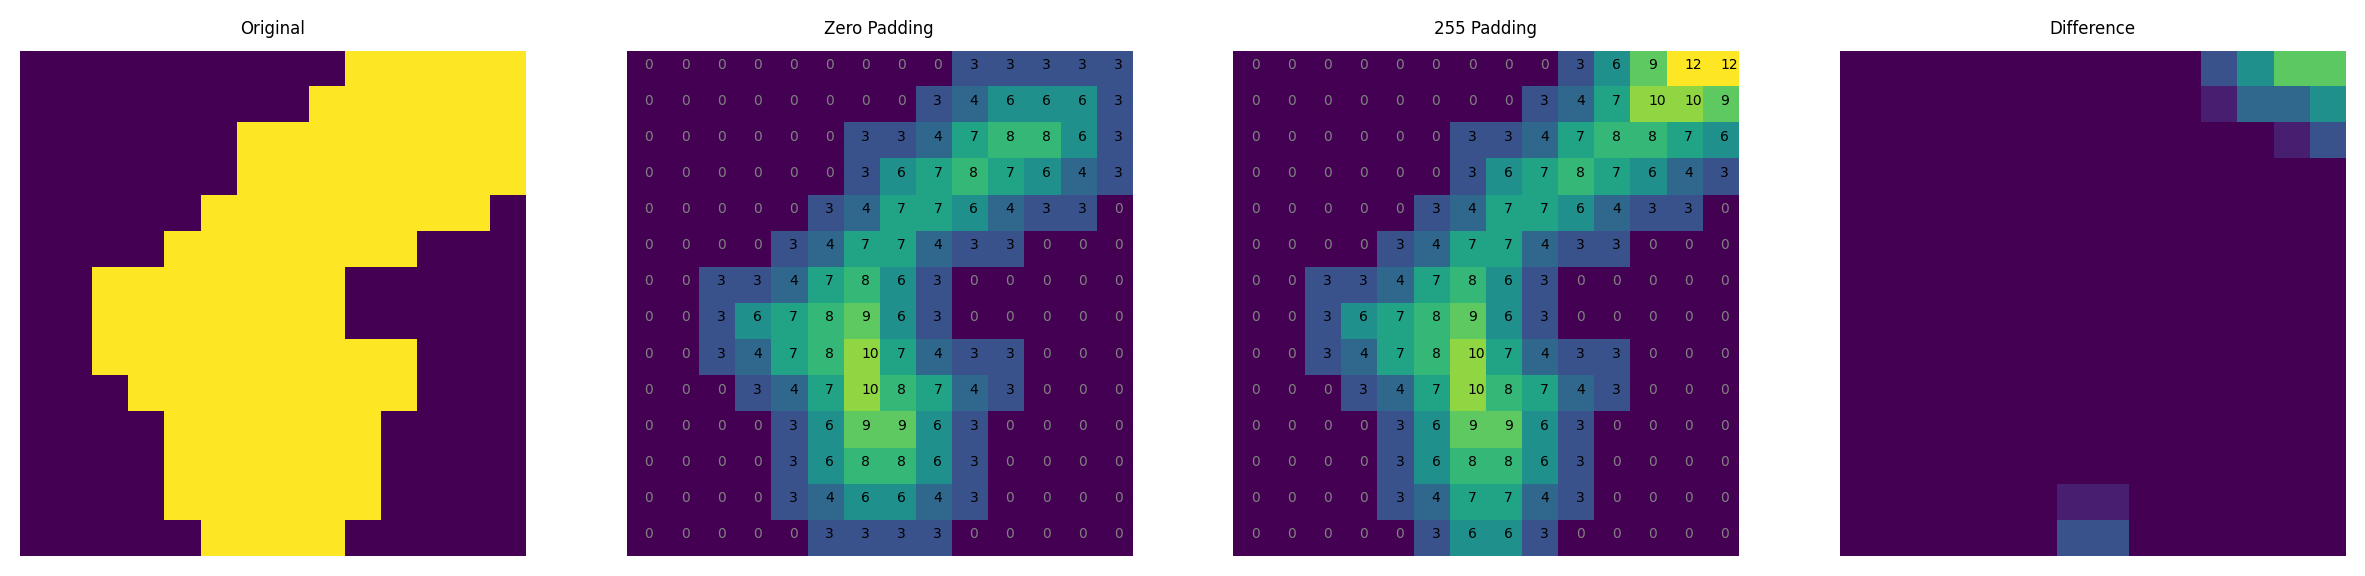

In [143]:
target = matrix2
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(target)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
chamfer_pad0 = chamfer(target, pad_value=0)
plt.imshow(chamfer_pad0, vmin=0, vmax=12)
plt.title('Zero Padding')
plt.axis('off')
for y in range(chamfer_pad0.shape[0]):
    for x in range(chamfer_pad0.shape[1]):
        if chamfer_pad0[y, x] == 0:
            plt.text(x, y, str(chamfer_pad0[y, x]), fontdict={'color':'gray'})
        else:
            plt.text(x, y, str(chamfer_pad0[y, x]))

plt.subplot(1, 4, 3)
chamfer_pad255 = chamfer(target, pad_value=255)
plt.imshow(chamfer_pad255, vmin=0, vmax=12)
plt.title('255 Padding')
plt.axis('off')
for y in range(chamfer_pad255.shape[0]):
    for x in range(chamfer_pad255.shape[1]):
        if chamfer_pad255[y, x] == 0:
            plt.text(x, y, str(chamfer_pad255[y, x]), fontdict={'color':'gray'})
        else:
            plt.text(x, y, str(chamfer_pad255[y, x]))

plt.subplot(1, 4, 4)
plt.imshow(chamfer_pad255-chamfer_pad0, vmin=0, vmax=12)
plt.title('Difference')
plt.axis('off')

plt.savefig('./img/06_chamfer_pad.png', dpi=150, bbox_inches='tight')